# Preface

Welcome to this hands-on exercise on LD Score Regression (LDSC), a powerful tool for estimating genetic correlations between traits and analyzing partitioned heritability. This practical session is designed for students with diverse backgrounds in genetics and bioinformatics, providing step-by-step guidance on applying LDSC to real-world genomic data.

#### Learning Objectives
In this exercise, you will learn how to:

1. Prepare summary statistics for LDSC analysis.
2. Estimate genetic correlations between two traits.
3. Perform partitioned heritability analysis to identify functional genomic categories contributing to heritability.

By the end of this session, you will gain practical experience in using LDSC to explore the genetic architecture of complex traits, a fundamental skill in statistical genetics and genomics research.


By completing this exercise, you will:
1. Understand the principles of LD Score Regression (LDSC) and its applications in genetic epidemiology.
2. Perform genetic correlation analysis between two traits using GWAS summary statistics.
3. Conduct partitioned heritability analysis to assess the contribution of different genomic annotations (e.g., coding regions, enhancers) to trait heritability.
4. Interpret LDSC output and recognize potential confounding factors in genetic correlation estimates.


#### Citation:
1. GWAS summary data for Ischemic Stroke: Mishra A, Malik R, Hachiya T, et al. Stroke genetics informs drug discovery and risk prediction across ancestries. Nature. 2022;611(7934):115-123. doi:10.1038/s41586-022-05165-3
        
        
        
        
        
        
        
        
2. GWAS summary data for Chronic heart failure: Sakaue S, Kanai M, Tanigawa Y, et al. A cross-population atlas of genetic associations for 220 human phenotypes. Nat Genet. 2021;53(10):1415-1424. doi:10.1038/s41588-021-00931-x
        
        
        
        
        
        
        
        
3. LDSC software: Bulik-Sullivan BK, Loh PR, Finucane HK, et al. LD Score regression distinguishes confounding from polygenicity in genome-wide association studies. Nat Genet. 2015;47(3):291-295. doi:10.1038/ng.3211
        
        
        
        
        
        
        
        

# Setup environment

In [2]:
source /home/student/USER/miniconda.sh
conda activate ldsc_env

(base) (ldsc_env) 


In [3]:
mkdir -p ~/sysu_day5_genetic_correlation_partitioned_heritability

cd ~/sysu_day5_genetic_correlation_partitioned_heritability

ln -sf  /home/student/USER/weiyuandan/Summer_School/ldsc/stroke_EA_mafile .
ln -sf  /home/student/USER/weiyuandan/Summer_School/ldsc/data/1000G_Phase3_EAS/ .
ln -sf /home/student/USER/weiyuandan/Summer_School/ldsc/data/1000G_Phase3_EAS/Cell_type_specific/Cahoy_EAS_1000Gv3_ldscores .
ln -sf /home/student/USER/weiyuandan/Summer_School/ldsc/data/1000G_Phase3_EAS/Cell_type_specific/Cahoy_1000Gv3_ldscores .



(ldsc_env) (ldsc_env) (ldsc_env) (ldsc_env) (ldsc_env) (ldsc_env) (ldsc_env) (ldsc_env) 


In [4]:
work_d <- path.expand("~/sysu_day5_genetic_correlation_partitioned_heritability")
if(!dir.exists(work_d)){dir.create(work_d)}
setwd(work_d)

## First let's get a list of the options 
Use "-h" command to print a list of all command-line options. If these commands fail with an error, then something as gone wrong during the installation process.


In [4]:

/home/student/ldsc/ldsc.py -h
/home/student/ldsc/munge_sumstats.py -h

usage: ldsc.py [-h] [--out OUT] [--bfile BFILE] [--l2] [--extract EXTRACT]
               [--keep KEEP] [--ld-wind-snps LD_WIND_SNPS]
               [--ld-wind-kb LD_WIND_KB] [--ld-wind-cm LD_WIND_CM]
               [--print-snps PRINT_SNPS] [--annot ANNOT] [--thin-annot]
               [--cts-bin CTS_BIN] [--cts-breaks CTS_BREAKS]
               [--cts-names CTS_NAMES] [--per-allele] [--pq-exp PQ_EXP]
               [--no-print-annot] [--maf MAF] [--h2 H2] [--h2-cts H2_CTS]
               [--rg RG] [--ref-ld REF_LD] [--ref-ld-chr REF_LD_CHR]
               [--w-ld W_LD] [--w-ld-chr W_LD_CHR] [--overlap-annot]
               [--print-coefficients] [--frqfile FRQFILE]
               [--frqfile-chr FRQFILE_CHR] [--no-intercept]
               [--intercept-h2 INTERCEPT_H2]
               [--intercept-gencov INTERCEPT_GENCOV] [--M M]
               [--two-step TWO_STEP] [--chisq-max CHISQ_MAX]
               [--ref-ld-chr-cts REF_LD_CHR_CTS] [--print-all-cts]
               [--print-cov] [

# 1. Calculate genetic correlation
## Getting started
Here, we take the genetic association between Ischemic Stroke and Coronary Artery Disease as an example to show how to  calculate the genetic association between two traits using ldsc software.

In [5]:
#1.View Data
ls ./stroke_EA_mafile/*txt

head  ./stroke_EA_mafile/IschemicStroke_mafile.txt
head  ./stroke_EA_mafile/CoronaryArteryDisease_mafile.txt


(ldsc_env) ./stroke_EA_mafile/CardioEmbolicStroke_mafile.txt
./stroke_EA_mafile/CoronaryArteryDisease_mafile.txt
./stroke_EA_mafile/IschemicStroke_mafile.txt
./stroke_EA_mafile/LargeArteryStroke_mafile.txt
./stroke_EA_mafile/SmallVesselStroke_mafile.txt
./stroke_EA_mafile/Stroke_mafile.txt
(ldsc_env) (ldsc_env) SNP	A1	A2	freq	b	se	p	N
rs79010578	A	T	0.132	-0.0152	0.0227	0.5027	256274
rs202009397	T	C	0.1204	-0.0234	0.0225	0.2969	256274
rs28544273	A	T	0.1425	-0.0185	0.0172	0.2833	256274
rs28527770	T	C	0.8579	0.0164	0.017	0.3341	256274
rs3094315	A	G	0.8425	0.0155	0.0154	0.3158	256274
rs3131971	T	C	0.1972	-0.0163	0.0168	0.332	256274
rs3115860	A	C	0.8047	0.0163	0.0171	0.3391	256274
rs3131970	T	C	0.1971	-0.0188	0.0173	0.2771	256274
rs10157329	A	T	0.1222	-0.0159	0.0195	0.4139	256274
(ldsc_env) SNP	A1	A2	freq	b	se	p	N
rs28544273	T	A	0.852293641290943	0.00310624717689226	0.0144571717494004	0.829877590684835	178726
rs28527770	T	C	0.852757337170587	0.00315981443987717	0.0144232874509865	0.8265898

# 1.1 Reformatting Summary Statistics
The summary statistics are not in the format (defined in the docs that understands). We strongly recommend that you use the script provided by the author in order to convert summary statistics into the format.

The --N command is used to specify the sample size for GWAS analysis.

The --merge-alleles command: Imputation quality is correlated with LD Score, and low imputation quality yields lower test statistics, so imputation quality is a confounder for LD Score regression. To prevent bias from variable imputation quality, poorly-imputed SNPs usually will be removed by filtering on INFO > 0.9. If you're using summary statistics that don't come with an INFO column, the authors recommend filtering to HapMap3 SNPs (using the or flags), because these seem to be well-imputed in most studies. In this case, since CoronaryArteryDisease_mafile.txt is filtered by INFO>0.9, the  --merge-alleles command  is not needed.

NOTE: This process can take around 3.5 minutes. At the end of the process, a standard formatted GWAS will be generated, with the suffix ‘sumstats.gz’.

In [6]:
/home/student/ldsc/munge_sumstats.py \
        --sumstats ./stroke_EA_mafile/IschemicStroke_mafile.txt \
        --out  IschemicStroke \
        --merge-alleles /home/student/USER/weiyuandan/Summer_School/ldsc/data/w_hm3.snplist

/home/student/ldsc/munge_sumstats.py \
        --sumstats ./stroke_EA_mafile/CoronaryArteryDisease_mafile.txt \
        --out   CoronaryArteryDisease

*********************************************************************
* LD Score Regression (LDSC)
* Version 1.0.1
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./munge_sumstats.py \
--out IschemicStroke \
--merge-alleles /home/student/USER/weiyuandan/Summer_School/ldsc/data/w_hm3.snplist \
--sumstats ./stroke_EA_mafile/IschemicStroke_mafile.txt 

Interpreting column names as follows:
b:	[linear/logistic] regression coefficient (0 --> no effect; above 0 --> A1 is trait/risk increasing)
N:	Sample size
A1:	Allele 1, interpreted as ref allele for signed sumstat.
p:	p-Value
A2:	Allele 2, interpreted as non-ref allele for signed sumstat.
SNP:	Variant ID (e.g., rs number)

Reading list of SNPs for allele merge from /home/student/USER/weiyuandan/Summer_School/ldsc/data/w_hm3.snplist
Read 1217311 SNPs for 

# 1.2 Calculating 
Note: This process can take around 20 seconds. At the end of the process, a standard formatted GWAS will be generated, with the suffix ‘.log’.

In [7]:
sumstatsfile1=IschemicStroke.sumstats.gz
sumstatsfile2=CoronaryArteryDisease.sumstats.gz

mkdir -p genetic_correlation_result
/home/student/ldsc/ldsc.py \
           --rg IschemicStroke.sumstats.gz,CoronaryArteryDisease.sumstats.gz \
           --ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
           --w-ld-chr  ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
           --out ./genetic_correlation_result/IschemicStroke_CoronaryArteryDisease

(ldsc_env) (ldsc_env) (ldsc_env) (ldsc_env) *********************************************************************
* LD Score Regression (LDSC)
* Version 1.0.1
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./ldsc.py \
--ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
--out ./genetic_correlation_result/IschemicStroke_CoronaryArteryDisease \
--rg IschemicStroke.sumstats.gz,CoronaryArteryDisease.sumstats.gz \
--w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. 

Beginning analysis at Fri Jul 25 14:46:44 2025
Reading summary statistics from IschemicStroke.sumstats.gz ...
Read summary statistics for 1033546 SNPs.
Reading reference panel LD Score from ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC

Reading the Results File

In [8]:

cat ./genetic_correlation_result/IschemicStroke_CoronaryArteryDisease.log


*********************************************************************
* LD Score Regression (LDSC)
* Version 1.0.1
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./ldsc.py \
--ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
--out ./genetic_correlation_result/IschemicStroke_CoronaryArteryDisease \
--rg IschemicStroke.sumstats.gz,CoronaryArteryDisease.sumstats.gz \
--w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. 

Beginning analysis at Fri Jul 25 14:46:44 2025
Reading summary statistics from IschemicStroke.sumstats.gz ...
Read summary statistics for 1033546 SNPs.
Reading reference panel LD Score from ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC.[1-22] ... (ldscore_fromlist)
Read referenc

# 1.3 Calculate genetic associations between remaining traits and plotting
Using the same method, we can calculate the pairwise genetic correlation between a total of 6 traits: LargeArteryStroke, SmallVesselStroke ,CardioEmbolicStroke, IschemicStroke, Stroke and  CoronaryArteryDisease.
( **To save time, the staff have already done this in advance, so we now can read them directly.**)

In [9]:
cp /home/student/USER/weiyuandan/Summer_School/ldsc/log/*log genetic_correlation_result
tail -n 5 ./genetic_correlation_result/IschemicStroke_CoronaryArteryDisease.log |head -n 1 > ldsc_genetic_correlation_result.txt
for file in `ls ./genetic_correlation_result/*log `
do
tail -n 4 $file |head -n 1 >> ldsc_genetic_correlation_result.txt
done


(ldsc_env) (ldsc_env) (ldsc_env) 


In [10]:
cat ldsc_genetic_correlation_result.txt

                                                                                                     p1                                                                                                               p2      rg     se      z       p  h2_obs  h2_obs_se  h2_int  h2_int_se  gcov_int  gcov_int_se
 /share/home/ggwsxysz1lsy/USER/weiyuandan/Summer_School/ldsc/output/CardioEmbolicStroke_sumstats.sumstats.gz  /share/home/ggwsxysz1lsy/USER/weiyuandan/Summer_School/ldsc/output/CoronaryArteryDisease_sumstats.sumstats.gz  0.3583  0.3489  1.0271  0.3044  0.0667      0.007  0.9694     0.0125   -0.0134       0.0058
 /share/home/ggwsxysz1lsy/USER/weiyuandan/Summer_School/ldsc/output/CardioEmbolicStroke_sumstats.sumstats.gz  /share/home/ggwsxysz1lsy/USER/weiyuandan/Summer_School/ldsc/output/IschemicStroke_sumstats.sumstats.gz  0.7836  0.5125  1.5291  0.1262  0.0141     0.0025  1.0379     0.0091    0.2267       0.0052
 /share/home/ggwsxysz1lsy/USER/weiyuandan/Summer_School/ldsc/output/Cardi

p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CardioEmbolicStroke,CoronaryArteryDisease,0.3583,0.3489,1.0271,3.0440e-01,0.0667,0.0070,0.9694,0.0125,-0.0134,0.0058
CardioEmbolicStroke,IschemicStroke,0.7836,0.5125,1.5291,1.2620e-01,0.0141,0.0025,1.0379,0.0091,0.2267,0.0052
CardioEmbolicStroke,LargeArteryStroke,1.1760,1.0926,1.0763,2.8180e-01,0.0030,0.0020,1.0180,0.0077,0.0417,0.0052
CardioEmbolicStroke,SmallVesselStroke,0.1713,0.5341,0.3207,7.4850e-01,0.0046,0.0021,1.0282,0.0077,0.0367,0.0053
CardioEmbolicStroke,Stroke,0.7059,0.5025,1.4048,1.6010e-01,0.0148,0.0024,1.0376,0.0084,0.1929,0.0052
CoronaryArteryDisease,CardioEmbolicStroke,0.3583,0.3489,1.0271,3.0440e-01,0.0013,0.0020,1.0064,0.0075,-0.0134,0.0058
CoronaryArteryDisease,IschemicStroke,-0.1274,0.1010,-1.2620,2.0690e-01,0.0139,0.0025,1.0357,0.0082,0.0188,0.0061
CoronaryArteryDisease,LargeArteryStroke,-0.4120,0.2081,-1.9801,4.7700e-02,0.0027,0.0019,1.0197,0.0071,0.0167,0.0056
CoronaryArteryDisease,SmallVesselStroke,-0.0618,0.1478,-0.4185,6.7560e-01,0.0046,0.0020,1.0262,0.0071,0.0179,0.0058


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


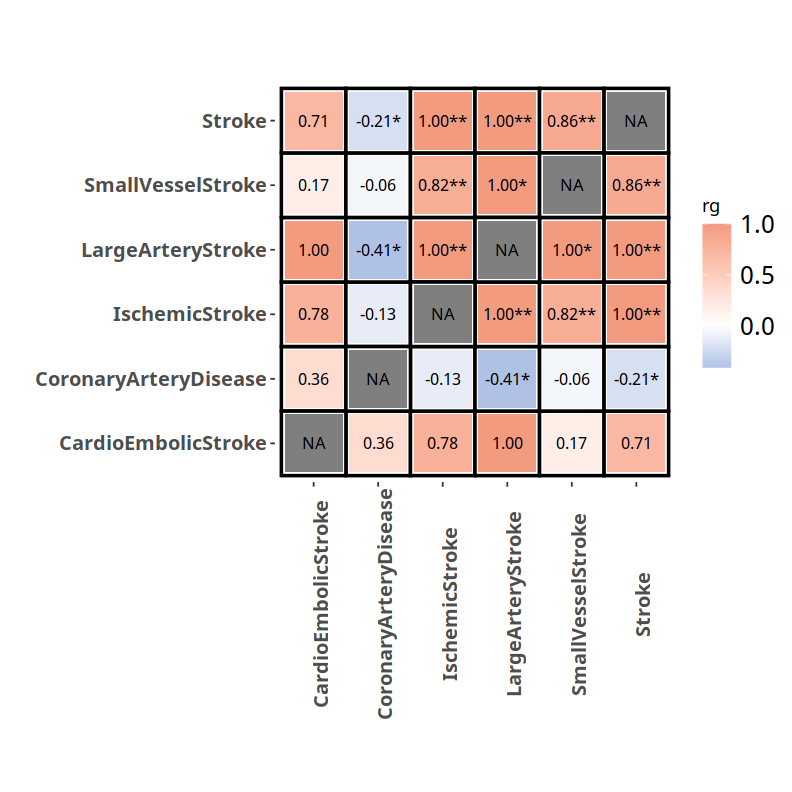

In [11]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))

ldsc<- read.table("ldsc_genetic_correlation_result.txt",header=T)
last_part <- sapply(strsplit(ldsc$p1, "/"), function(x) x[length(x)])
ldsc$p1<- sub("_sumstats.sumstats.gz$", "", last_part)
last_part <- sapply(strsplit(ldsc$p2, "/"), function(x) x[length(x)])
ldsc$p2<- sub("_sumstats.sumstats.gz$", "", last_part)
ldsc

thre<-0.05/6
ldsc<-ldsc%>%dplyr::select(p1,p2,rg,p) %>%
  mutate(Significance=if_else(p<thre, "significant",if_else(p<0.05, "nominal","not_significant")),
         marker=if_else(p<thre, "**",if_else(p<0.05, "*","")))

traits<-unique(ldsc$p2)
traits1<-traits
ldsc2<-data.frame(p1=traits,p2=traits)
ldsc2$rg<-NA
ldsc2$p<-NA
ldsc2$Significance<-NA
ldsc2$marker <-""
ldsc_cp<-ldsc
ldsc<-rbind(ldsc,ldsc2)
ldsc$rg[ldsc$rg>1]<-1


options(repr.plot.width = 6.6, repr.plot.height = 6.6) 
ggplot(ldsc) +
  geom_tile(aes(p1,p2),fill="white" ,colour = "black",size=1)+
  geom_point(aes(p1,p2,color=rg), size =16 ,shape = 15) +
  scale_color_gradient2(low = "#0073C2FF", mid = "white", high = "#F39B7FFF", midpoint = 0)+
  geom_text(aes(p1,p2,label = sprintf("%.2f%s", rg, marker)), color = "black", size = 3.5)+
  theme(
    plot.title = element_text(size=18,face = 'bold'),
    legend.background = element_blank(),
    legend.key = element_blank(), 
    legend.text= element_text(size = 15), 
    panel.background=element_blank(), 
    panel.border=element_blank(),
    panel.grid = element_blank(),
    panel.grid.minor=element_line(linetype=0), 
    axis.title=element_text(size=15,face = 'bold'),
    axis.text.x=element_text(size=12,face = 'bold',angle = 90), #angle = 90 colour = "blue"
    axis.text.y=element_text(size=12,face = 'bold')
  )+
  coord_fixed() +
  guides(size = FALSE)+
  labs(title = "",
       x="",
       y="", fill="LDSC rg"
  )+  scale_y_discrete(position = "left")



# 2.  Partition heritability
In this example, we will partition the heritability of stroke by functional category, using the baseline model. 


# 2.1 Calculating
This process is expected to take 2 minutes

In [12]:
/home/student/ldsc/ldsc.py \
--h2 IschemicStroke.sumstats.gz \
--ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline. \
--w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
--overlap-annot  \
--frqfile-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_plinkfiles/1000G.EAS.QC. \
--out IschemicStroke.Partition_heritability_test

/home/student/ldsc/ldsc.py \
--h2 CoronaryArteryDisease.sumstats.gz \
--ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline. \
--w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
--overlap-annot  \
--frqfile-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_plinkfiles/1000G.EAS.QC. \
--out CoronaryArteryDisease.Partition_heritability_test

*********************************************************************
* LD Score Regression (LDSC)
* Version 1.0.1
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./ldsc.py \
--h2 IschemicStroke.sumstats.gz \
--ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline. \
--out IschemicStroke.Partition_heritability_test \
--overlap-annot  \
--frqfile-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_plinkfiles/1000G.EAS.QC. \
--w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. 

Beginning analysis at Fri Jul 25 16:08:34 2025
Reading summary statistics from IschemicStroke.sumstats.gz ...
Read summary statistics for 1033546 SNPs.
Reading reference panel LD Score from ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline.[1-22] ... (ldscore_fr

# 2.2 Reading the Results File

In [13]:
head IschemicStroke.Partition_heritability_test.results
head CoronaryArteryDisease.Partition_heritability_test.results

Category	Prop._SNPs	Prop._h2	Prop._h2_std_error	Enrichment	Enrichment_std_error	Enrichment_p
baseL2_0	1.0	1.0	0.0	1.0	0.0	NA
Coding_UCSC.bedL2_0	0.014195876324475188	0.002035766772836345	0.09886011835723607	0.143405502154627	6.96400251013675	0.9015664812994396
Coding_UCSC.extend.500.bedL2_0	0.06345595846300996	0.1850040733575109	0.12234600613795395	2.9154720508296212	1.9280459881363616	0.3172010984335632
Conserved_LindbladToh.bedL2_0	0.02455105116004544	0.302685122213389	0.17834425528254477	12.328804996585278	7.264220750465606	0.11863193354784574
Conserved_LindbladToh.extend.500.bedL2_0	0.32984577037377405	0.5317939443207149	0.2409396876332838	1.6122503063116365	0.7304616559437952	0.3872994862960266
CTCF_Hoffman.bedL2_0	0.02386756902886112	-0.2072626148650898	0.15791416634152314	-8.683859450221506	6.616265198628747	0.13137975251494793
CTCF_Hoffman.extend.500.bedL2_0	0.07094701770123639	0.05452422283891534	0.1673982060565656	0.7685202931083197	2.359481927224805	0.9207145345849255
DGF_EN

# 2.3 Plotting for partition_heritability


载入程辑包：‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


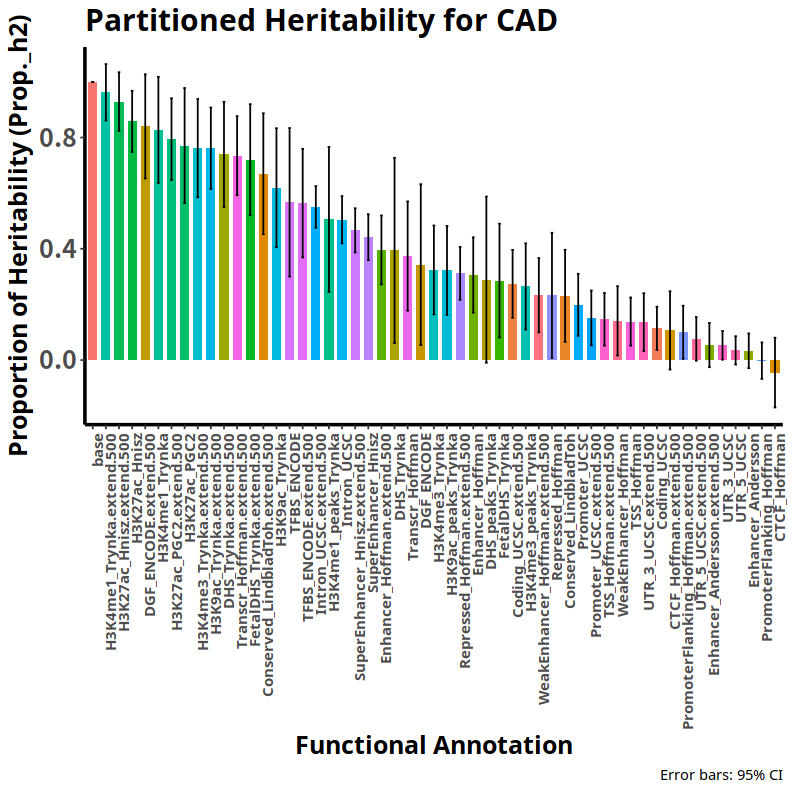

In [14]:
library(data.table)
library(ggplot2)

df<-fread("CoronaryArteryDisease.Partition_heritability_test.results")
df$Annotation <- gsub("L2_0", "", df$Category)
df$Annotation <- gsub(".bed", "", df$Annotation)
colnames(df)[2:4]<-c("Prop_SNPs","Prop_h2","Prop_h2_std_error")
ggplot(df, aes(x = reorder(Annotation, -Prop_h2), y = Prop_h2, fill = Annotation)) +
  geom_col(width = 0.7) +
  geom_errorbar(aes(ymin = Prop_h2 - 1.96 * Prop_h2_std_error, 
                    ymax = Prop_h2 + 1.96 * Prop_h2_std_error),
                width = 0.2) +
  labs(
    title = "Partitioned Heritability for CAD", # by Functional Category
    x = "Functional Annotation",
    y = "Proportion of Heritability (Prop._h2)",
    caption = "Error bars: 95% CI"
  ) +
  ggplot2::theme(
    legend.title = element_blank(),
    legend.position = "none",
    legend.key = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(size =18,face = 'bold'),
    panel.background = element_blank(),
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_line(linetype = 0),
    axis.title = element_text(size = 15, face = 'bold'),
    axis.text.y = element_text(size = 15, face = 'bold'),
    axis.text.x = element_text(size = 9, face = 'bold',angle = 90, hjust = 1),
    axis.line = element_line(color = "black", size = 1)
  )

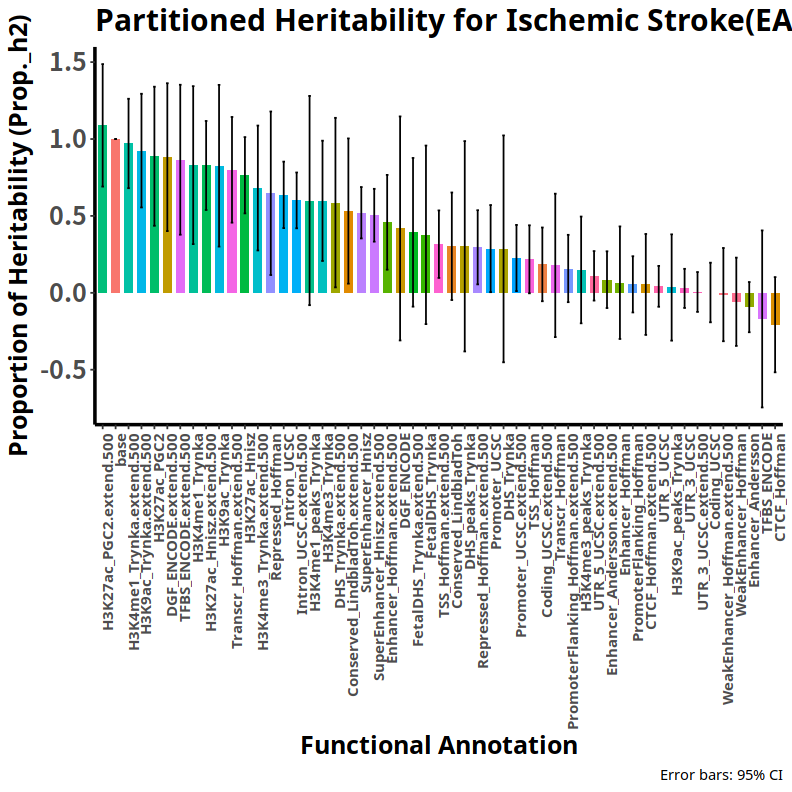

In [15]:
library(data.table)
library(ggplot2)

df<-fread("IschemicStroke.Partition_heritability_test.results")

df$Annotation <- gsub("L2_0", "", df$Category)
df$Annotation <- gsub(".bed", "", df$Annotation) 
colnames(df)[2:4]<-c("Prop_SNPs","Prop_h2","Prop_h2_std_error")
ggplot(df, aes(x = reorder(Annotation, -Prop_h2), y = Prop_h2, fill = Annotation)) +
  geom_col(width = 0.7) +
  geom_errorbar(aes(ymin = Prop_h2 - 1.96 * Prop_h2_std_error, 
                    ymax = Prop_h2 + 1.96 * Prop_h2_std_error),
                width = 0.2) +
  labs(
    title = "Partitioned Heritability for Ischemic Stroke(EA)", # by Functional Category
    x = "Functional Annotation",
    y = "Proportion of Heritability (Prop._h2)",
    caption = "Error bars: 95% CI"
  ) +
  ggplot2::theme(
    legend.title = element_blank(),
    legend.position = "none",
    legend.key = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(size =18,face = 'bold'),
    panel.background = element_blank(),
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_line(linetype = 0),
    axis.title = element_text(size = 15, face = 'bold'),
    axis.text.y = element_text(size = 15, face = 'bold'),
    axis.text.x = element_text(size = 9, face = 'bold',angle = 90, hjust = 1),
    axis.line = element_line(color = "black", size = 1)
  )

# 3 Cell-type specific Partitioned Heritability

Cell-type specific Partitioned Heritability is used to test whether disease heritability is enriched in regions surrounding genes with the highest specific expression in a given tissue.

Citation: 
1. Finucane HK, Reshef YA, Anttila V, et al. Heritability enrichment of specifically expressed genes identifies disease-relevant tissues and cell types. Nat Genet. 2018;50(4):621-629. doi:10.1038/s41588-018-0081-4
        
        
        
        
        
        
2. A Transcriptome Database for Astrocytes, Neurons, and Oligodendrocytes: A New Resource for Understanding Brain Development and Function

# 3.1 Calculating
This process is expected to take 1.5 minutes.

In [16]:
/home/student/ldsc/ldsc.py \
        --h2-cts  IschemicStroke.sumstats.gz \
        --ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline. \
        --w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
        --ref-ld-chr-cts ./1000G_Phase3_EAS/Cell_type_specific/Cahoy.ldcts  \
        --out IschemicStroke.Cell_type_Partition_heritability_test

/home/student/ldsc/ldsc.py \
        --h2-cts  CoronaryArteryDisease.sumstats.gz \
        --ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline. \
        --w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. \
        --ref-ld-chr-cts ./1000G_Phase3_EAS/Cell_type_specific/Cahoy.ldcts  \
        --out CoronaryArteryDisease.Cell_type_Partition_heritability_test

*********************************************************************
* LD Score Regression (LDSC)
* Version 1.0.1
* (C) 2014-2019 Brendan Bulik-Sullivan and Hilary Finucane
* Broad Institute of MIT and Harvard / MIT Department of Mathematics
* GNU General Public License v3
*********************************************************************
Call: 
./ldsc.py \
--h2-cts IschemicStroke.sumstats.gz \
--ref-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline. \
--out IschemicStroke.Cell_type_Partition_heritability_test \
--ref-ld-chr-cts ./1000G_Phase3_EAS/Cell_type_specific/Cahoy.ldcts \
--w-ld-chr ./1000G_Phase3_EAS/1000G_Phase3_EAS_weights_hm3_no_MHC/weights.EAS.hm3_noMHC. 

Beginning analysis at Fri Jul 25 16:10:32 2025
Reading summary statistics from IschemicStroke.sumstats.gz ...
Read summary statistics for 1033546 SNPs.
Reading reference panel LD Score from ./1000G_Phase3_EAS/1000G_Phase3_EAS_baseline_v1.2_ldscores/baseline.[1-22] ... (ldscore_fromlist)
Read 

# 3.2  Read the result



In [7]:
head IschemicStroke.Cell_type_Partition_heritability_test.cell_type_results.txt
head CoronaryArteryDisease.Cell_type_Partition_heritability_test.cell_type_results.txt

Name	Coefficient	Coefficient_std_error	Coefficient_P_value
Neuron	6.130248486868361e-10	7.865359514141427e-10	0.21787253804035372
Oligodendrocyte	-2.3037826329558024e-10	9.290898327008811e-10	0.5979178002675503
Astrocyte	-1.0351631404302047e-09	8.516918874776593e-10	0.8878969803247738
(ldsc_env) Name	Coefficient	Coefficient_std_error	Coefficient_P_value
Neuron	1.5564350614258615e-10	1.7003913986506323e-09	0.4635341738338384
Oligodendrocyte	-6.742221304793006e-10	2.1896481915729615e-09	0.6209259047221156
Astrocyte	-7.311562158225708e-10	2.046162351937896e-09	0.6395778001793115
(ldsc_env) 


# 3.3 Plotting

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


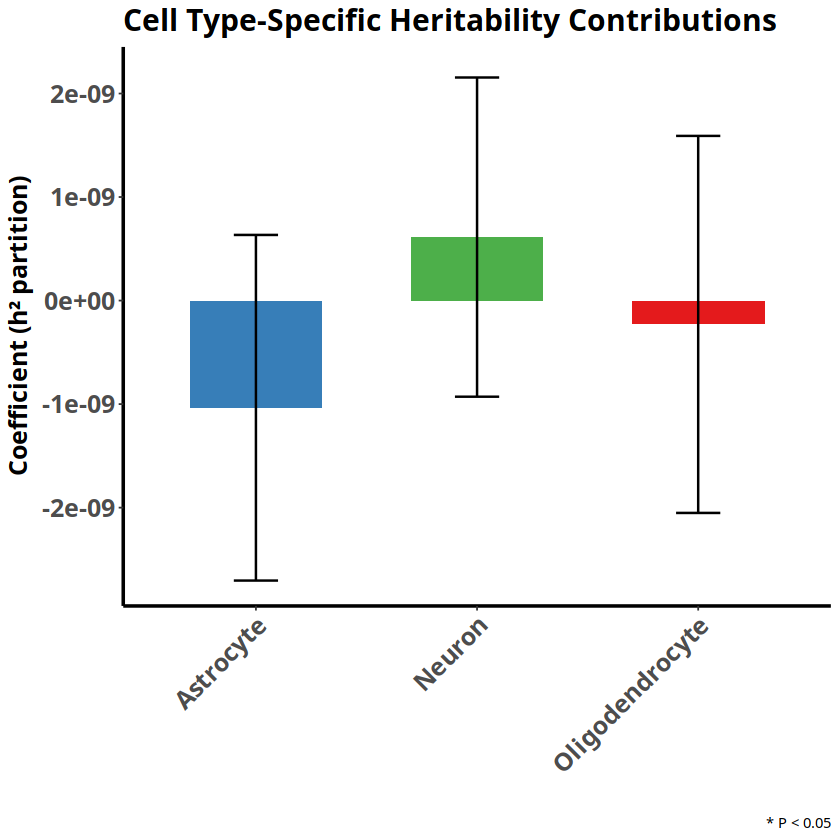

In [8]:
library(ggplot2)

data <- read.table("IschemicStroke.Cell_type_Partition_heritability_test.cell_type_results.txt",header=T)


data$lower <- data$Coefficient - 1.96 * data$Coefficient_std_error
data$upper <- data$Coefficient + 1.96 * data$Coefficient_std_error
colnames(data)[1]<-"CellType"

ggplot(data, aes(x = CellType, y = Coefficient, fill = CellType)) +
  geom_col(width = 0.6) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, linewidth = 0.7) +
  geom_text(aes(label = ifelse(Coefficient_P_value < 0.05, "*", ""), y = upper + 0.5e-10), 
            size = 8, vjust = 0.5) +
  scale_fill_manual(values = c("Neuron" = "#4daf4a", 
                               "Astrocyte" = "#377eb8", 
                               "Oligodendrocyte" = "#e41a1c")) +
  labs(
    title = "Cell Type-Specific Heritability Contributions",
    x = "",
    y = "Coefficient (h² partition)",
    caption = "* P < 0.05"
  )+
  ggplot2::theme(
    legend.title = element_blank(),
    legend.position = "none",
    legend.key = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(size =18,face = 'bold'),
    panel.background = element_blank(),
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_line(linetype = 0),
    axis.title = element_text(size = 15, face = 'bold'),
    axis.text = element_text(size = 15, face = 'bold'),
    axis.line = element_line(color = "black", size = 1)
  ) +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 45, hjust = 1))

# 4 Extended training--gsMap

gsMap (genetically informed spatial mapping of cells for complex traits) integrates spatial transcriptomics (ST) data with genome-wide association study (GWAS) summary statistics to map cells to human complex traits, including diseases, in a spatially resolved manner.

Citation: Song L, Chen W, Hou J, Guo M, Yang J. Spatially resolved mapping of cells associated with human complex traits. Nature. 2025;641(8064):932-941. doi:10.1038/s41586-025-08757-x
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

# 4.1 calculating

The parameters of gsmap have the following meanings:
--workdir: The working directory where output files will be saved.

--homolog_file: The homologous gene file for converting gene names from different species to human.

--sample_name: The name of the sample (e.g., E16.5_E1S1.MOSTA).

--gsMap_resource_dir: Path to the directory containing the gsMap resources.

--hdf5_path: Path to the input HDF5 file with spatial transcriptomics (ST) data.

--annotation: The name of the annotation column in the adata.obs of the input HDF5 file.

--data_layer: The layer of the gene expression matrix (e.g., count).

--sumstats_file: Path to the GWAS summary statistics file.

--trait_name: Name of the trait (e.g., IQ).

In [9]:
conda activate gsMap
ln -s /home/student/USER/weiyuandan/Summer_School/gsMap/gsMap_resource .
ln -s /home/student/USER/weiyuandan/Summer_School/gsMap/gsMap_example_data .
echo "Starting gsMap..." > gsmap_run.log

#gsmap quick_mode \
#   --workdir './example_quick_mode/Mouse_Embryo' \
#    --homolog_file 'gsMap_resource/homologs/mouse_human_homologs.txt' \
#    --sample_name 'E16.5_E1S1.MOSTA' \
#   --gsMap_resource_dir 'gsMap_resource' \
#   --hdf5_path 'gsMap_example_data/ST/E16.5_E1S1.MOSTA.h5ad' \
#    --annotation 'annotation' \
#    --data_layer 'count' \
#    --sumstats_file 'gsMap_example_data/GWAS/IQ_NG_2018.sumstats.gz' \
#    --trait_name 'IQ' > gsmap_run.log 2>&1

(gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) (gsMap) 


# 4.2 Results for the IQ gsMap-plot
The gsMap plot illustrates how strongly spatial expression patterns in the embryo correlate with a given GWAS trait — in this case, **IQ**. Each pixel reflects a tissue region, and its color encodes the statistical significance (−log₁₀(p)) of association with GWAS signals. Warmer colors (e.g. orange/red) suggest stronger genetic relevance in those spatial areas.

The annotations on the right denote identified anatomical structures such as brain, spinal cord, kidney, liver, etc.


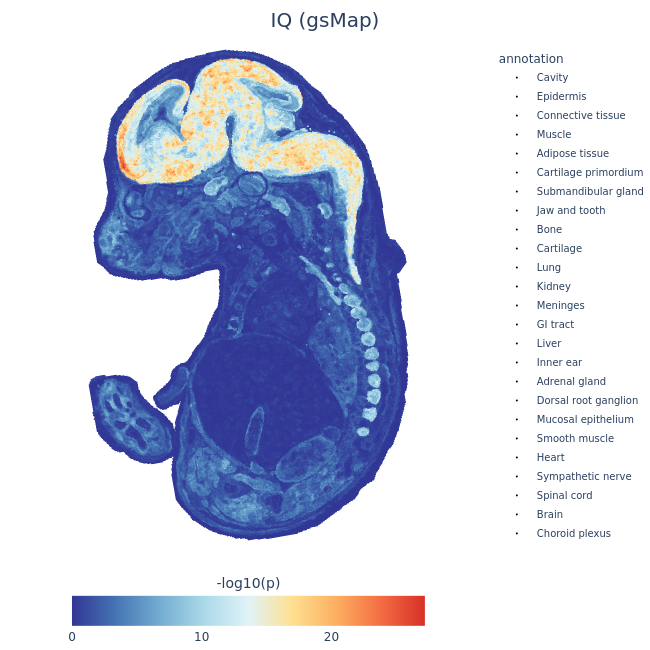

# 4.3 Additional Options
If you want to analyze multiple traits at once, provide a configuration file (--sumstats_config_file) instead of a single summary statistics file:

In [10]:
gsmap quick_mode \
    --workdir './example_quick_mode/Mouse_Embryo' \
    --homolog_file 'gsMap_resource/homologs/mouse_human_homologs.txt' \
    --sample_name 'E16.5_E1S1.MOSTA' \
    --gsMap_resource_dir 'gsMap_resource' \
    --hdf5_path 'gsMap_example_data/ST/E16.5_E1S1.MOSTA.h5ad' \
    --annotation 'annotation' \
    --data_layer 'count' \
    --sumstats_config_file 'gsMap_example_data/GWAS/gwas_config.yaml'

                                   ___  ___            
                                   |  \/  |            
                          __ _ ___ | .  . | __ _ _ __  
                         / _` / __|| |\/| |/ _` | '_ \ 
                        | (_| \__ \| |  | | (_| | |_) |
                         \__, |___/\_|  |_/\__,_| .__/ 
                          __/ |                 | |    
                         |___/                  |_|
                                Version: 1.73.5                                 
[2025-07-25 16:27:30,728] INFO | gsMap - Running quick_mode...
[2025-07-25 16:27:30,728] INFO | gsMap - Started at: 2025-07-25 16:27:30
[2025-07-25 16:27:31,734] INFO | gsMap - Resource usage summary:
[2025-07-25 16:27:31,734] INFO | gsMap -   • Wall clock time: 1.01 seconds
[2025-07-25 16:27:31,734] INFO | gsMap -   • CPU time: 3.14 seconds
[2025-07-25 16:27:31,734] INFO | gsMap -   • Average CPU utilization: 615.6%
[2025-07-25 16:27:31,734] INFO | gsMap -   • Peak memo